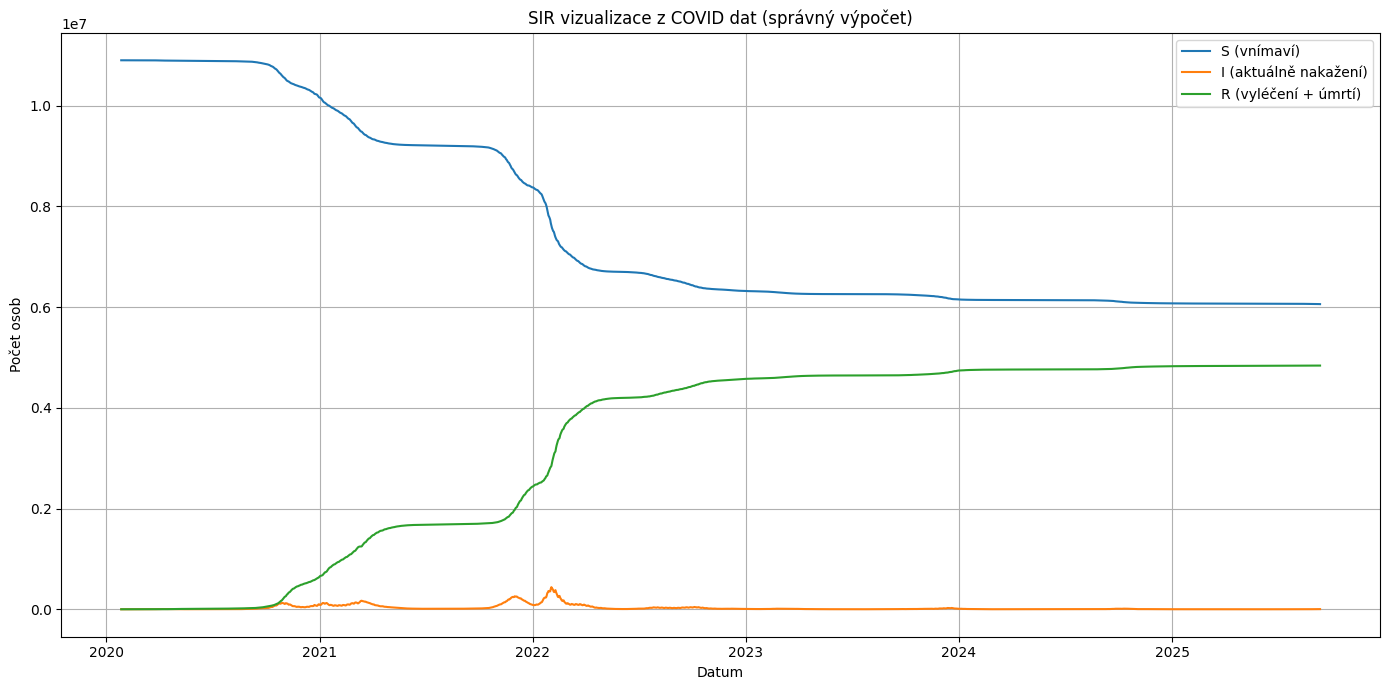

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Načtení a příprava dat ===
data = pd.read_csv("data_covid.csv")           # nebo absolutní cesta, pokud je potřeba
data["datum"] = pd.to_datetime(data["datum"])
data = data.sort_values("datum")

# === Parametry ===
pop_total = 10.9e6  # velikost populace (ČR ~ 10.9 mil.)

# === SIR ze skutečných dat ===
# R = vyléčení + úmrtí
R = data["kumulativni_pocet_vylecenych"] + data["kumulativni_pocet_umrti"]

# I = aktuálně nakažení = kumulativně nakažení − (vyléčení + úmrtí)
I = data["kumulativni_pocet_nakazenych"] - R
#I = data["prirustkovy_pocet_nakazenych"]

# S = vnímaví = populace − kumulativně nakažení
S = pop_total - data["kumulativni_pocet_nakazenych"]

# === Vizualizace (absolutní počty) ===
plt.figure(figsize=(14, 7))
plt.plot(data["datum"], S, label="S (vnímaví)")
plt.plot(data["datum"], I, label="I (aktuálně nakažení)")
plt.plot(data["datum"], R, label="R (vyléčení + úmrtí)")
plt.xlabel("Datum")
plt.ylabel("Počet osob")
plt.title("SIR vizualizace z COVID dat (správný výpočet)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

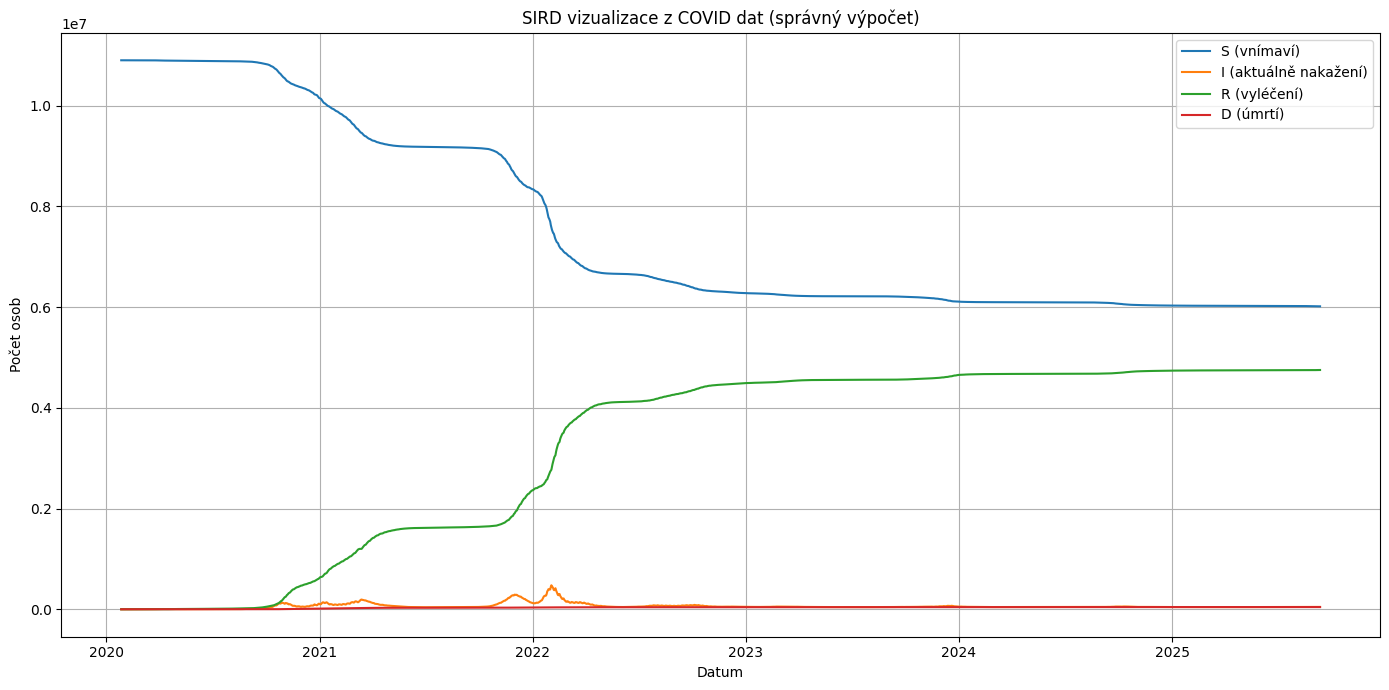

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Načtení a příprava dat ===
data = pd.read_csv("data_covid.csv")
data["datum"] = pd.to_datetime(data["datum"])
data = data.sort_values("datum")

# === Parametry ===
pop_total = 10.9e6  # velikost populace (ČR ~ 10.9 mil.)

# === SIR ze skutečných dat ===

# D = umrti
D = data["kumulativni_pocet_umrti"]

# R = vyléčení 
R = data["kumulativni_pocet_vylecenych"] - D

# I = aktuálně nakažení = kumulativně nakažení − (vyléčení + úmrtí)
I = data["kumulativni_pocet_nakazenych"] - R - D
#I = data["prirustkovy_pocet_nakazenych"]

# S = vnímaví = populace − kumulativně nakažení
S = pop_total - data["kumulativni_pocet_nakazenych"] - D


# === Vizualizace (absolutní počty) ===
plt.figure(figsize=(14, 7))
plt.plot(data["datum"], S, label="S (vnímaví)")
plt.plot(data["datum"], I, label="I (aktuálně nakažení)")
plt.plot(data["datum"], R, label="R (vyléčení)")
plt.plot(data["datum"], D, label="D (úmrtí)")
plt.xlabel("Datum")
plt.ylabel("Počet osob")
plt.title("SIRD vizualizace z COVID dat (správný výpočet)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Vyhledání parametrů
dR = data["prirustkovy_pocet_vylecenych"] + data["prirustkovy_pocet_umrti"]
gamma = dR / I

dI = I.diff()

S = pop_total - data["kumulativni_pocet_nakazenych"]
beta = ((dI / I) + gamma) / (S / pop_total)

print(f"parametry: \n Beta: {np.mean(beta)} | Gamma: {np.mean(gamma)}")


parametry: 
 Beta: 0.036499275319264245 | Gamma: 0.02510002106162422


Final values:
S = 448242.3687039861
I = 314.28161997129155
R = 551443.3496760417
True 0


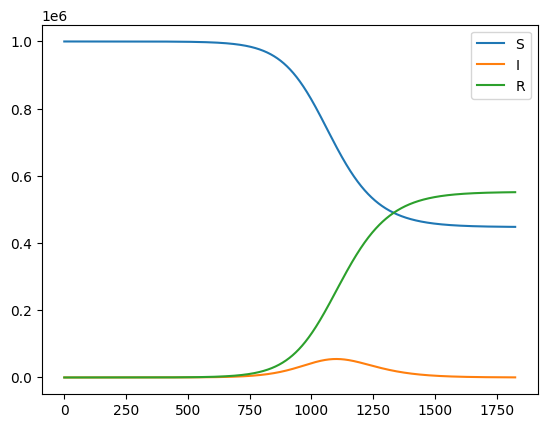

In [73]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIR(T, N, beta, gamma):
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného
    R[0] = 0

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -beta * S[t] * I[t] / N
        dI = beta * S[t] * I[t] / N - gamma * I[t]
        dR = gamma * I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS
        I[t+1] = I[t] + dI
        R[t+1] = R[t] + dR

    return S, I, R


#D = 7 #7dní infikační doba - covid
#R_0 = 3.5 #
#beta = R_0 * 1/D
#print("Beta", beta)
#gamma = 1/D
#print("Gamma", beta)

S, I, R = getSIR(365*5, int(1e6), beta=np.mean(beta), gamma=np.mean(gamma))

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])
print("R =", R[-1])

#simple check
print(int(1e6) == round(S[-1]+I[-1]+R[-1]),0)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.show()